In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Data/Potato',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE


)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])
  print('tensor to numpy',image_batch[0].numpy())
  print(image_batch[0].shape)

tf.Tensor(
[[[141. 129. 129.]
  [157. 145. 145.]
  [176. 164. 164.]
  ...
  [209. 199. 198.]
  [209. 199. 198.]
  [212. 202. 201.]]

 [[155. 143. 143.]
  [154. 142. 142.]
  [151. 139. 139.]
  ...
  [202. 192. 191.]
  [201. 191. 190.]
  [203. 193. 192.]]

 [[151. 139. 139.]
  [142. 130. 130.]
  [148. 136. 136.]
  ...
  [200. 190. 189.]
  [198. 188. 187.]
  [200. 190. 189.]]

 ...

 [[156. 144. 148.]
  [158. 146. 150.]
  [157. 145. 149.]
  ...
  [176. 165. 171.]
  [170. 159. 165.]
  [178. 167. 173.]]

 [[154. 142. 146.]
  [159. 147. 151.]
  [160. 148. 152.]
  ...
  [174. 163. 169.]
  [166. 155. 161.]
  [172. 161. 167.]]

 [[155. 143. 147.]
  [162. 150. 154.]
  [165. 153. 157.]
  ...
  [189. 178. 184.]
  [181. 170. 176.]
  [187. 176. 182.]]], shape=(256, 256, 3), dtype=float32)
tensor to numpy [[[141. 129. 129.]
  [157. 145. 145.]
  [176. 164. 164.]
  ...
  [209. 199. 198.]
  [209. 199. 198.]
  [212. 202. 201.]]

 [[155. 143. 143.]
  [154. 142. 142.]
  [151. 139. 139.]
  ...
  [202. 192. 

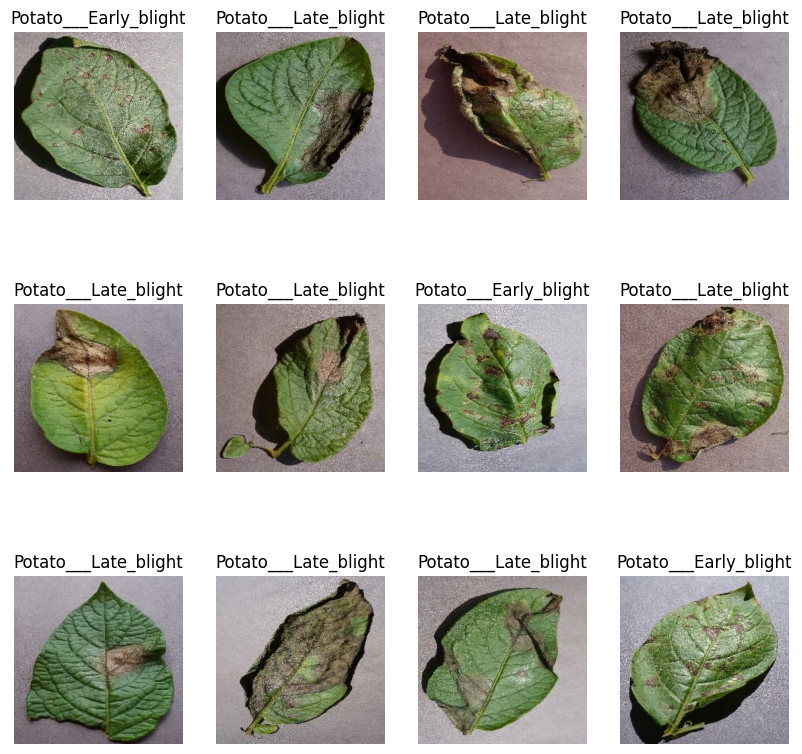

In [ ]:
plt.figure(figsize=(10,10))
for image,label in dataset.take(1):
  for i in range(12):

    ax=plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[label[i]])


In [ ]:
len(dataset)

68

In [ ]:
train_size=0.8
X_train=dataset.take(int(len(dataset)*train_size))
len(X_train)

54

In [ ]:
test_ds=dataset.skip(54)
len(X_test)

14

In [ ]:
val_size=0.1
X_val=test_ds.take(int(len(dataset)*val_size))

In [ ]:
len(X_val)

6

In [ ]:
X_test=test_ds.skip(6)
len(X_test)

8

In [ ]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12) #seed is for predicatbility
  ds_size=len(ds)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  #prefetch and cache in vedio cb

In [ ]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),

    layers.experimental.preprocessing.Rescaling(1.0/255) #scale the image
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 0s 28ms/step - loss: 0.0739 - accuracy: 0.9766


In [ ]:
scores #first param is loss and second accuracy

[0.07394152879714966, 0.9765625]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accurcay')

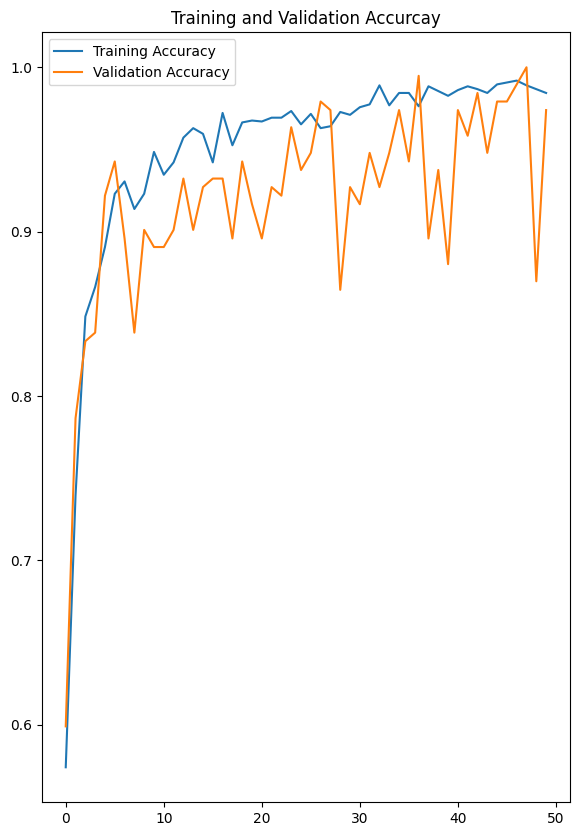

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accurcay')

Text(0.5, 1.0, 'Training and Validation Loss')

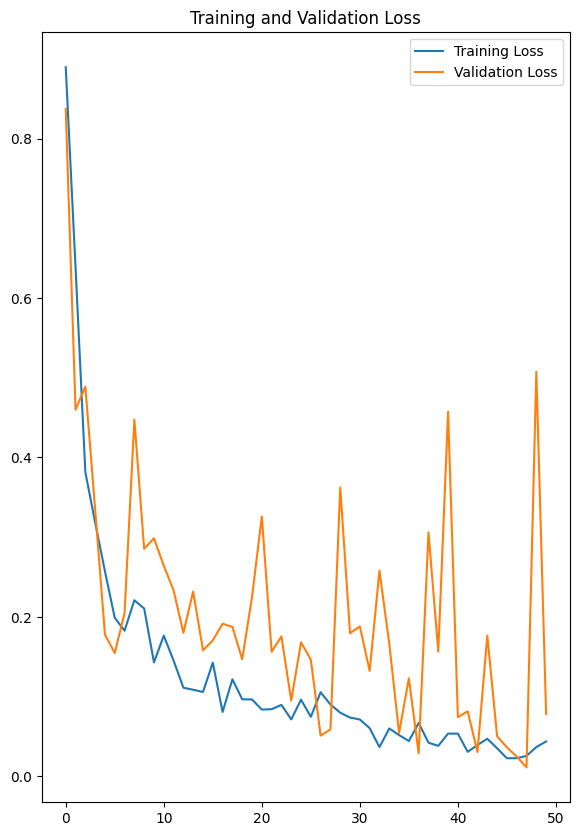

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

first image to predict
first image label Potato___Early_blight
1/1 [==============================] - 0s 36ms/step
Potato___Early_blight


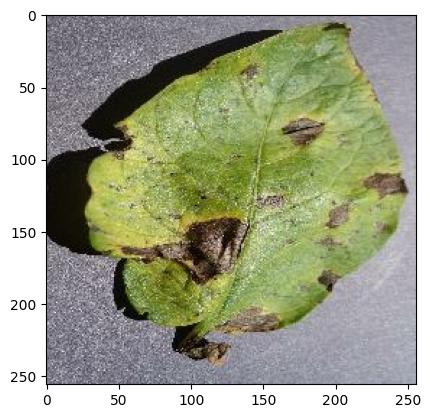

In [ ]:
import numpy as np
for image,label in test_ds.take(1):
  first_image=image[0].numpy().astype('uint8')
  first_label=label[0].numpy()


  print('first image to predict')
  plt.imshow(first_image)
  print('first image label',class_names[first_label])

  batch_prediction=model.predict(image)
  print(class_names[np.argmax(batch_prediction[0])])


In [ ]:
#Model saving
# model_name='Potato_Model'
# model.save('/content/drive/MyDrive/ML Models/Potato_Model')